In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, random_split
from src.our_code import ViTEncoder
from src.dataset.dataset import JEPADataset
from src.mask.mask import generate_masks
from src.mask.multiblock import MaskCollator as MBMaskCollator

In [2]:
mask_collator = MBMaskCollator(
  input_size=(96, 96),
  patch_size=12,
  pred_mask_scale=(0.15, 0.2),
  enc_mask_scale=(0.85, 1.0),
  aspect_ratio=(0.75, 1.5),
  nenc=1,
  npred=4,
  allow_overlap=False,
  min_keep=4,
)

dataset = JEPADataset(
  dataset_path="dataset/archive",
  labels_filename="labels.csv",
)

generator1 = torch.Generator().manual_seed(42)
train_dataset, test_dataset = random_split(
  dataset, [0.8, 0.2], generator=generator1
)

train_loader = DataLoader(
  train_dataset, batch_size=2, collate_fn=mask_collator, shuffle=True
)
a, b, c = 0, 0, 0
for a, b, c in train_loader:
  break

In [4]:
a

tensor([[[[0.1216, 0.1529, 0.1725,  ..., 0.8392, 0.8471, 0.8353],
          [0.1333, 0.1569, 0.1686,  ..., 0.8392, 0.8392, 0.8235],
          [0.1373, 0.1529, 0.1725,  ..., 0.8392, 0.8431, 0.8275],
          ...,
          [0.7137, 0.6471, 0.7686,  ..., 0.4627, 0.4941, 0.4863],
          [0.7294, 0.7137, 0.7176,  ..., 0.4353, 0.5176, 0.4745],
          [0.6627, 0.7412, 0.6980,  ..., 0.4745, 0.4431, 0.4902]],

         [[0.0627, 0.0824, 0.0941,  ..., 0.2039, 0.2196, 0.1882],
          [0.0667, 0.0863, 0.0941,  ..., 0.2078, 0.2078, 0.1882],
          [0.0706, 0.0863, 0.0980,  ..., 0.2118, 0.2118, 0.2039],
          ...,
          [0.4824, 0.3961, 0.5373,  ..., 0.3098, 0.3569, 0.3647],
          [0.5216, 0.4902, 0.4706,  ..., 0.2941, 0.3725, 0.3451],
          [0.4078, 0.5176, 0.4471,  ..., 0.3255, 0.3059, 0.3647]],

         [[0.0353, 0.0431, 0.0510,  ..., 0.1765, 0.1882, 0.1765],
          [0.0431, 0.0471, 0.0510,  ..., 0.1843, 0.1804, 0.1725],
          [0.0392, 0.0471, 0.0549,  ..., 0

In [48]:
im = a[0][0].permute(1, 2, 0)

In [49]:
im.shape

torch.Size([96, 96, 3])

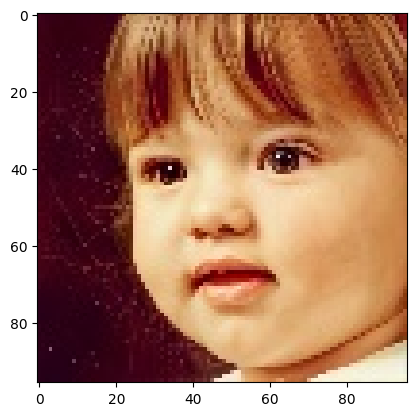

In [50]:
plt.imshow(im)

In [51]:
b[0][0]

tensor([ 3,  4,  5,  6, 11, 12, 13, 14, 21, 22, 24, 25, 30, 32, 38, 40, 46, 48,
        52, 53, 54])

In [52]:
for i in b[0][0]:
  im[(i % 8) * 12: (i % 8 + 1) * 12, (i // 8) * 12: (i // 8 + 1) * 12] /= 5

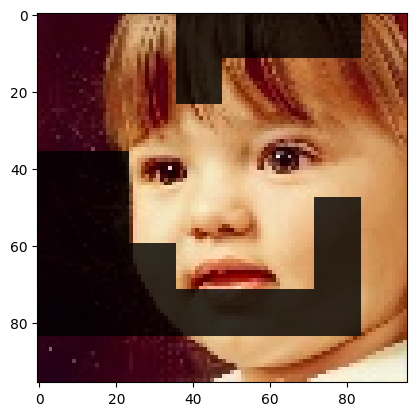

In [53]:
plt.imshow(im)

In [54]:
im = a[0][0].permute(1, 2, 0)

In [55]:
for e in range(4):
  for i in c[e][0]:
    im[(i % 8) * 12: (i % 8 + 1) * 12, (i // 8) * 12: (i // 8 + 1) * 12] /= 2

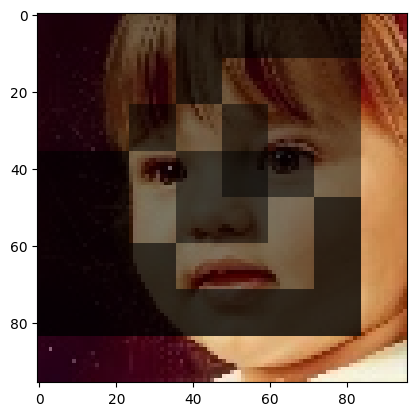

In [56]:
plt.imshow(im)